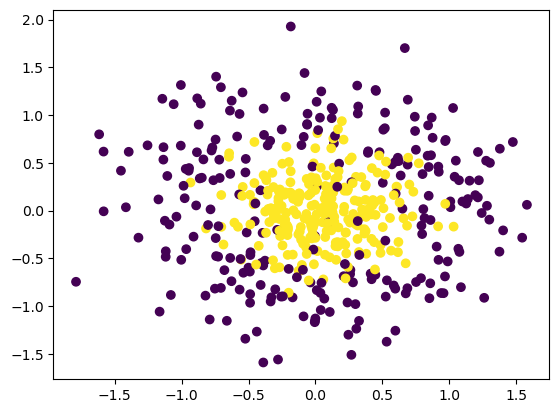

In [178]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
%matplotlib inline

np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.2, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

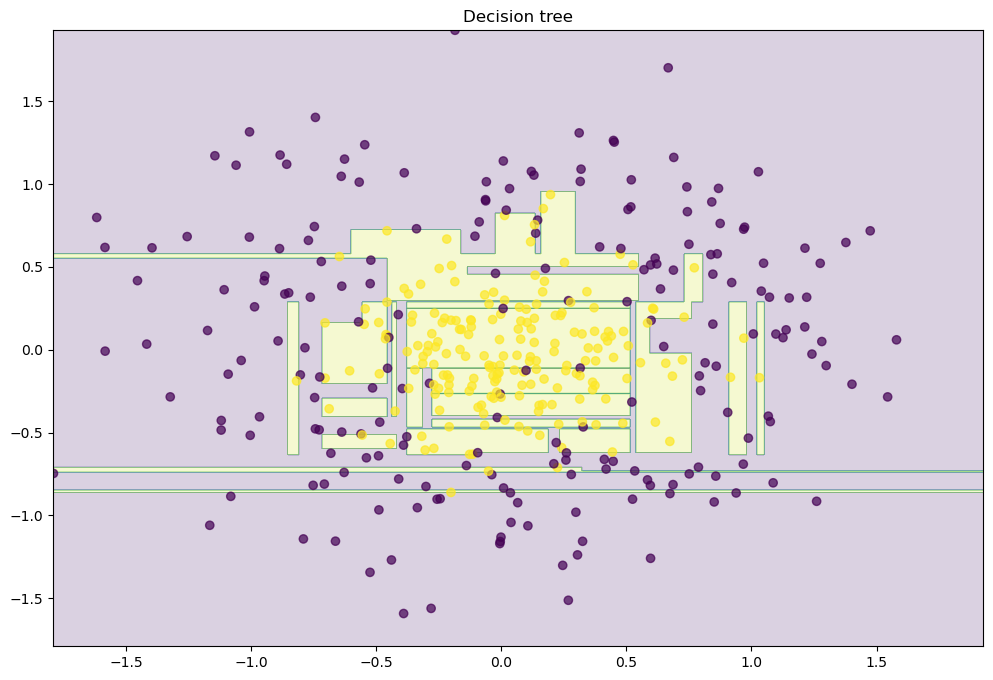

In [179]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 1000)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

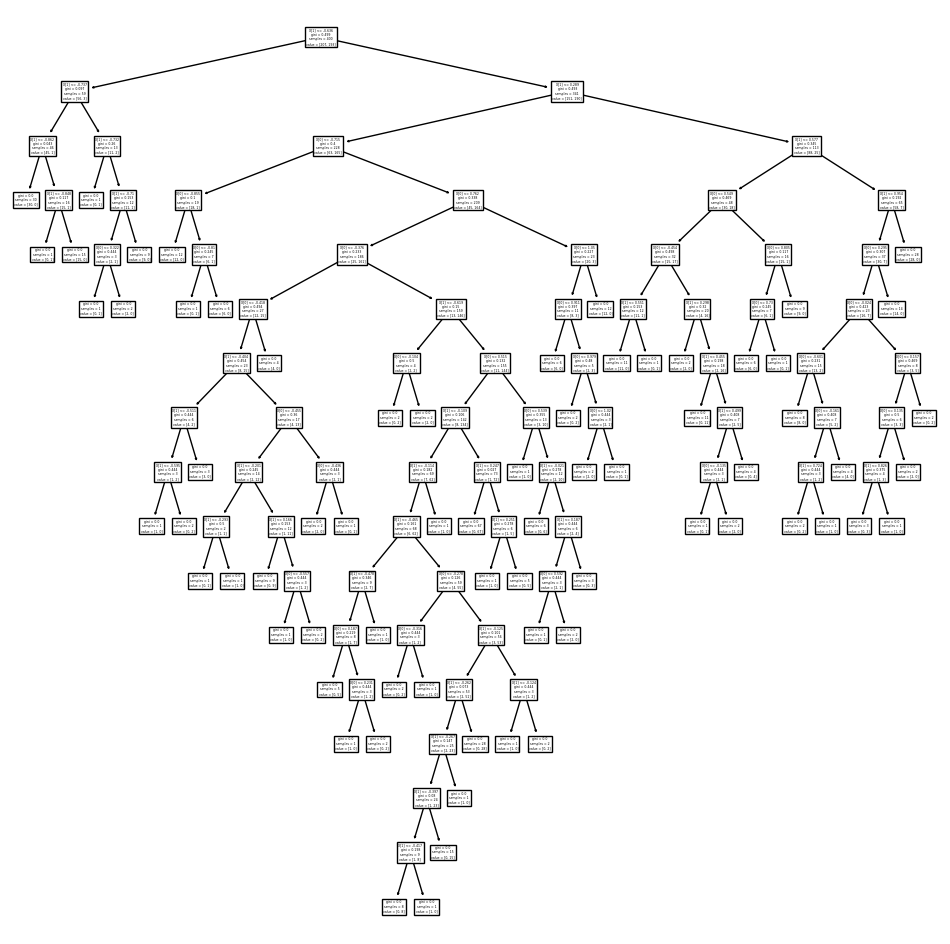

In [180]:
plt.figure(figsize=(12,12))
tree.plot_tree(dtree)
plt.savefig('tree_high_dpi', dpi=200)

Error on test data is: 0.08


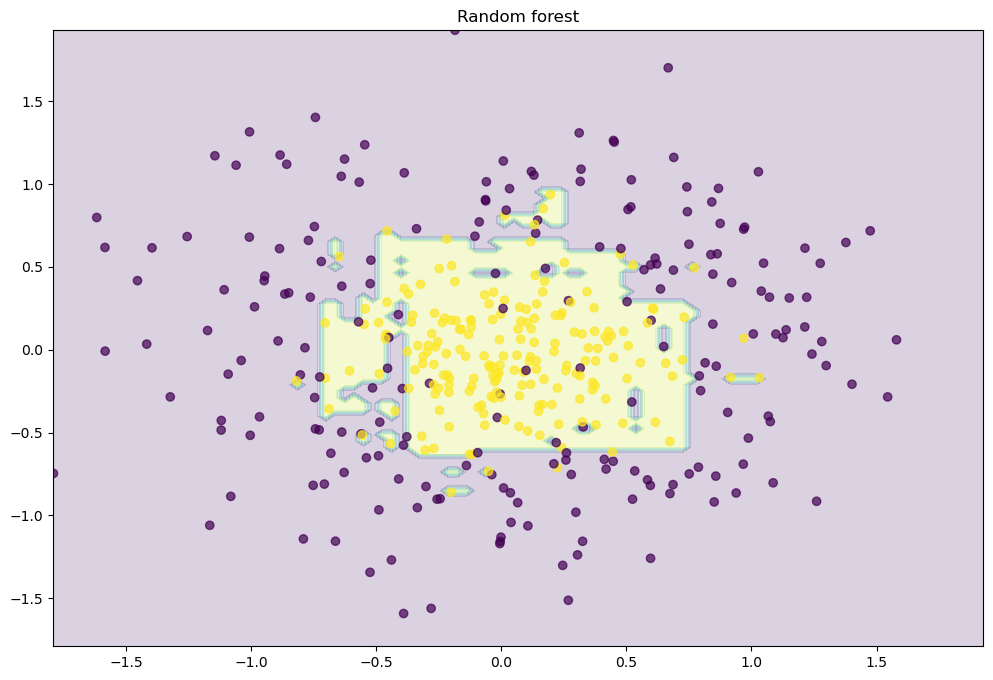

In [181]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = np.sum(np.square(y_pred-y_test))/y_pred.size
print(f"Error on test data is: {mse}")

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

Error on train data is: 0.0
Error on test data is: 0.14


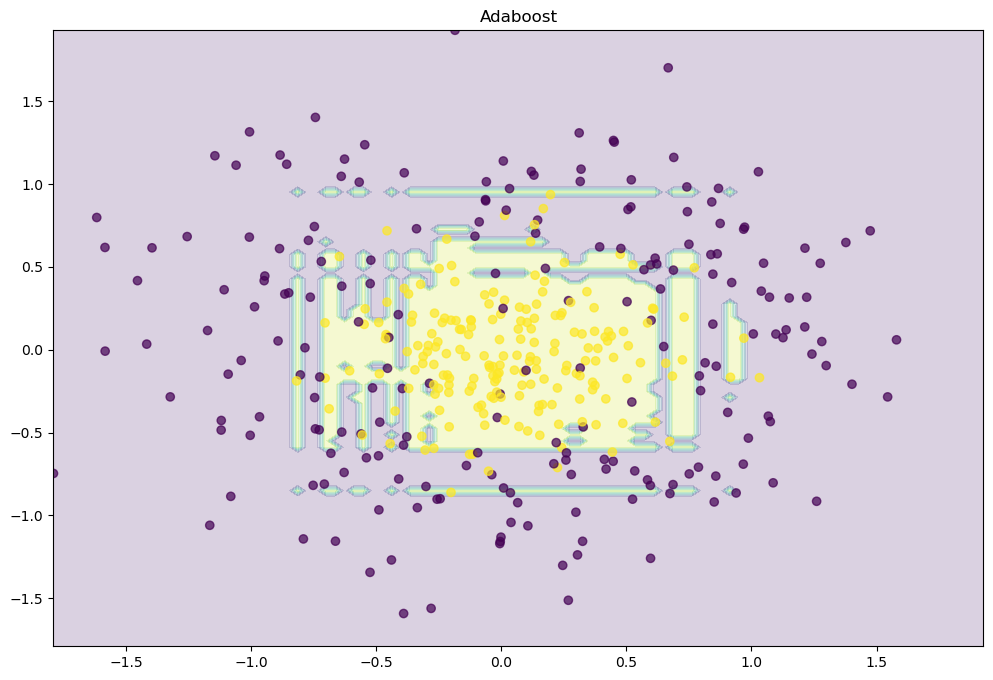

In [183]:
clf = AdaBoostClassifier(n_estimators=1000, learning_rate=1, random_state=42)
model1 = clf.fit(X_train, y_train)
y_pred = model1.predict(X_train)
mse = np.sum(np.square(y_pred-y_train))/y_pred.size
print(f"Error on train data is: {mse}")
#Predict the response for test dataset
y_pred = model1.predict(X_test)
mse = np.sum(np.square(y_pred-y_test))/y_pred.size
print(f"Error on test data is: {mse}")
plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = model1.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis', alpha=.7)
plt.title("Adaboost")
plt.show()

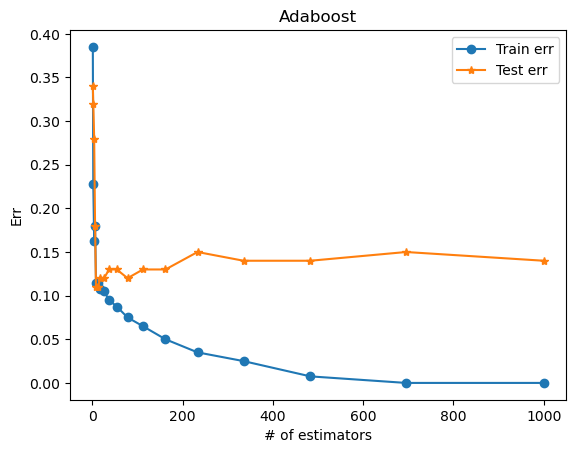

In [191]:
mse_tr = np.zeros(0)
mse_test = np.zeros(0)

range_est = np.logspace(0,3,20)
range_est=np.unique(np.int32(range_est))

for nest in range_est:
    clf = AdaBoostClassifier(n_estimators=int(nest), learning_rate=1, random_state=42)
    model1 = clf.fit(X_train, y_train)
    y_hat_tr = model1.predict(X_train)
    mse_tr = np.append(mse_tr,np.sum(np.square(y_hat_tr-y_train))/y_hat_tr.size)
    y_hat_test = model1.predict(X_test)
    mse_test = np.append(mse_test, np.sum(np.square(y_hat_test-y_test))/y_hat_test.size)
    
plt.plot(range_est,mse_tr,'o-')
plt.plot(range_est,mse_test,'*-')
plt.legend(['Train err','Test err'])
plt.ylabel('Err')
plt.xlabel('# of estimators')
plt.title('Adaboost')
plt.show()

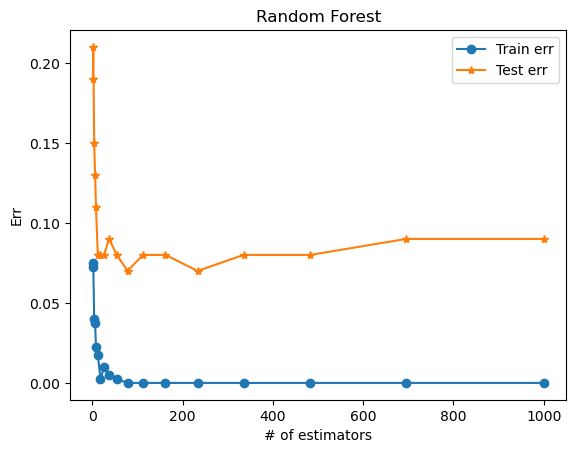

In [192]:
mse_tr = np.zeros(0)
mse_test = np.zeros(0)


range_est = np.logspace(0,3,20)
range_est=np.unique(np.int32(range_est))

for nest in range_est:
    clf = RandomForestClassifier(n_estimators = np.int32(nest), random_state=42)
    model1 = clf.fit(X_train, y_train)
    y_hat_tr = model1.predict(X_train)
    mse_tr = np.append(mse_tr,np.sum(np.square(y_hat_tr-y_train))/y_hat_tr.size)
    y_hat_test = model1.predict(X_test)
    mse_test = np.append(mse_test, np.sum(np.square(y_hat_test-y_test))/y_hat_test.size)
    
plt.plot(range_est,mse_tr,'o-')
plt.plot(range_est,mse_test,'*-')
plt.legend(['Train err','Test err'])
plt.ylabel('Err')
plt.xlabel('# of estimators')
plt.title('Random Forest')
plt.show()